<div style="text-align: center;">
    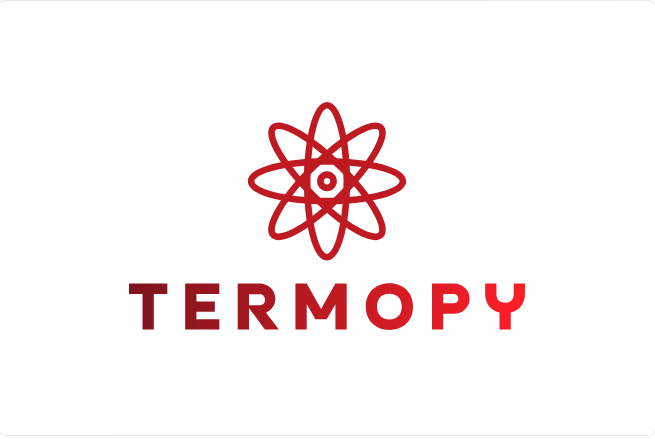
</div>

# Termopy: Modeling Thermodynamic Processes and Cycles

## Introduction

Welcome to Termopy, a Python library designed to assist in the calculation and visualization of thermodynamic processes and cycles. Whether you're studying physics (FYS102) or working on projects related to thermodynamics, Termopy is a powerful tool that can help you analyze and represent the behavior of ideal gases during various processes.

## Key Features

Termopy is organized into two main modules: the process package and the main package. These modules work together to provide a range of functionality, allowing you to examine different states of an ideal gas as it undergoes various processes. Termopy is designed to be user-friendly, and it automatically checks for numerical errors to ensure the accuracy of your results.

## How It Works

### Object-Oriented Approach

Termopy takes an object-oriented approach to thermodynamic modeling. At the heart of the library is the concept of a "fluid," which represents the working gas. To start using Termopy, you'll create a fluid object and provide it with essential information to determine the initial state of the gas. You can specify the gas type by name, choose from a list of 80 pre-defined gases stored in the library, or simply label it as "monatomic" or "diatomic," which will default to Helium and Nitrogen-2, respectively. If no gas type is specified, Termopy assumes the working gas is air.

### Simulating Processes

Once you've defined your fluid object, you can simulate a variety of processes. Termopy offers predefined methods for isothermal, isobaric, isochoric, and adiabatic processes, with the potential for additional process types to be added in the future. To simulate a process, you'll need to specify an endpoint or a final state for a gas property such as pressure, volume, or temperature. Keep in mind that certain processes, like isothermal, cannot be defined by their final temperature due to their static nature.

### State Vector

Every time you invoke one of the process methods, Termopy generates a state vector within the fluid object. This state vector records changes in internal variables over time, allowing you to closely examine the behavior of the gas during the simulated process.


### Visualization

To make your analysis even more insightful, Termopy provides built-in methods for visualization. You can use the "plot()" and "show()" functions, which extend the capabilities of the popular Matplotlib library. These functions simplify the programming process, making it easy for users to create plots and save them for further reference.

# The fluid Object

To begin modeling thermodynamic processes and cycles using the Termopy library, you'll first need to create a Fluid object. This object serves as the foundation for your thermodynamic simulations, allowing you to define the properties and initial conditions of the gas you want to analyze.

### Example: creating an instance

In the below example, we create a Fluid object named "O2" to represent oxygen. When initializing the object, you can specify key parameters such as pressure (P), volume (V), and temperature (T). You can also specify the gas by name, formula, or choose from predefined gases within the library.

The Fluid object serves as your tool to explore and analyze the behavior of the gas during different thermodynamic processes. You can then use various methods and functions provided by Termopy to simulate and visualize these processes.

In [12]:
import termoPy as tp

O2 = tp.Fluid(P=1e5, V=1e-3, T=500, gas='O2')

print(f"""
pressure: {O2.pressure} Pa
volume: {O2.volume*1000} L
temperature: {O2.temperature} K
number of moles: {O2.n:.3f} mol

gas name: {O2.name}
chemical formula: {O2.formula}
molar mass: {O2.M:.3f} kg/mol
Heat capacity under constant pressure: {O2.Cp:.2e} J/(mol K)
Heat capacity under constant volume: {O2.Cv:.2e} J/(mol K)
atomic diameter: {O2.diameter:.2e} m
atomic mas: {O2.atomic_mass:.2e} kg
""")



pressure: [100000.] Pa
volume: [1.] L
temperature: [500] K
number of moles: 0.024 mol

gas name: Oxygen
chemical formula: O2
molar mass: 0.032 kg/mol
Heat capacity under constant pressure: 2.94e+01 J/(mol K)
Heat capacity under constant volume: 2.11e+01 J/(mol K)
atomic diameter: 3.00e-10 m
atomic mas: 5.31e-26 kg



This code snippet prints out information about the attributes of the Fluid object. It provides details about pressure, volume, temperature, the number of moles, gas name, chemical formula, molar mass, heat capacities, atomic diameter, and atomic mass. These attributes are essential for understanding the gas's initial conditions and properties as you start your thermodynamic simulations.

### Using process methods

When calling a method, you can specify the final state of the gas by providing a value for one of the following parameters: pressure (P), volume (V), or temperature (T). The method will then calculate the final state of the gas based on the initial conditions and the specified final state. The method will also generate a state vector, which records changes in internal variables over time.

In [16]:
import pandas as pd
import termoPy as tp

# Create a Fluid object and perform a thermodynamic process
O2 = tp.Fluid(P=1e5, V=1e-3, T=500, gas='O2')
O2.isothermal(P=2.4e5)

# Get the first and last elements
pd.DataFrame({
    "Attribute": ["Pressure [Atm]", "Volume [L]", "Temperature [K]"],
    "First Value": [O2.pressure[0]/101325, O2.volume[0]*1000, O2.temperature[0]],
    "Last Value": [O2.pressure[-1]/101325, O2.volume[-1]*1000, O2.temperature[-1]]
})

df

,Attribute,First Value,Last Value
0,Pressure [Atm],0.986923,2.368616
1,Volume [L],1.000000,0.416667
2,Temperature [K],500.000000,500.000000


In the above code, you can see the initial- and final states of ideal oxygen gas. As we can see, the temperature remains unchanged throughout the process. This is because the process is isothermal, meaning that the temperature remains constant. The pressure and volume, however, change as the gas expands.

### multiple processes

In [21]:
import pandas as pd
import termoPy as tp

# Create a Fluid object and perform a thermodynamic process
O2 = tp.Fluid(P=1e5, V=1e-3, T=500, gas='O2')
O2.adiabatic(P=2.4e5)
O2.isobaric(T=600)

# Get the first and last elements
pd.DataFrame({
    "Attribute": ["Pressure [Atm]", "Volume [L]", "Temperature [K]"],
    "First Value": [O2.pressure[0]/101325, O2.volume[0]*1000, O2.temperature[0]],
    "Last Value": [O2.pressure[-1]/101325, O2.volume[-1]*1000, O2.temperature[-1]]
})

,Attribute,First Value,Last Value
0,Pressure [Atm],0.986923,2.368616
1,Volume [L],1.000000,0.500000
2,Temperature [K],500.000000,600.000000


We can also do several processes on a single fluid object. For example, we can perform an isothermal process, then an isobaric process, and finally an isochoric process.

## Visualizing Simulated Processes

Termopy provides a set of functions for visualizing the simulated thermodynamic processes. Two key functions for generating and displaying plots are "plot()" and "show()". Additionally, you can use the "save()" function to save plots as PNG files. These functions are designed to offer flexibility in creating and managing multiple plots before displaying or saving them all at once.

### The plot() Function

The "plot()" function is used to create visual representations of the state vector of the thermodynamic process. When using the "plot()" function, you can specify the elements to be plotted by setting the "display" variable as a string of desired elements. TermoPy supports plotting of the following elements:
- Pressure (P)
- Volume (V)
- Temperature (T)
- Entropy (S)

### Plotting Options

1. **Single-Variable Plot (One-Character String):** If the "display" is set as a one-character string, it will generate a plot showing the change in the specified variable over time. You can also specify the time taken for each process, which will be represented on the plot.

2. **Two-Variable Plot (Two-Character String):** When "display" is set as a two-character string, the function will create a plot showing the change in the first variable over the change in the second variable. Similar to the single-variable plot, you can specify the time taken for each process.

3. **Three-Dimensional Plot (Three-Character String):** For a more advanced visualization, setting "display" as a three-character string results in a three-dimensional plot of the process within the given 3-axis space.

### The show() Function

After using the "plot()" function to generate plots, you can use the "show()" function to display them in your Jupyter Notebook. This separation of functions allows you to create and customize multiple plots before presenting them. The "show()" function simplifies the process of viewing and analyzing the graphical representations of thermodynamic processes.

In summary, Termopy offers a versatile set of functions for visualizing thermodynamic processes. By utilizing "plot()" and "show()" in combination, you can generate and present graphical representations of your simulations, enhancing your understanding of the behavior of ideal gases in various processes.

### example of 1-variable plot

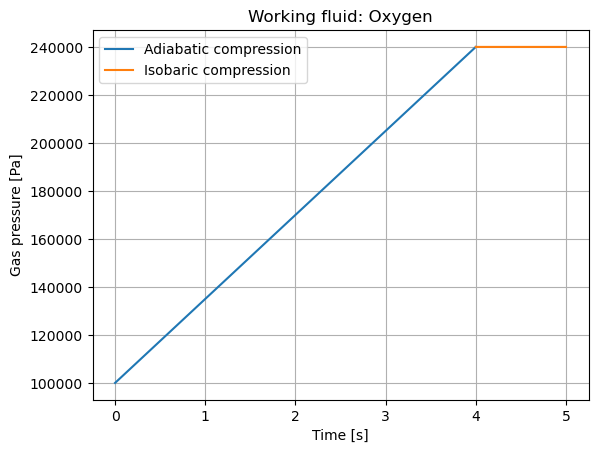

In [23]:
import termoPy as tp

# Create a Fluid object and perform a thermodynamic process
O2 = tp.Fluid(P=1e5, V=1e-3, T=500, gas='O2')
O2.adiabatic(P=2.4e5, time=4)
O2.isobaric(T=600)

tp.plot(O2, display="P")
tp.show()

### example of 2-variable plot

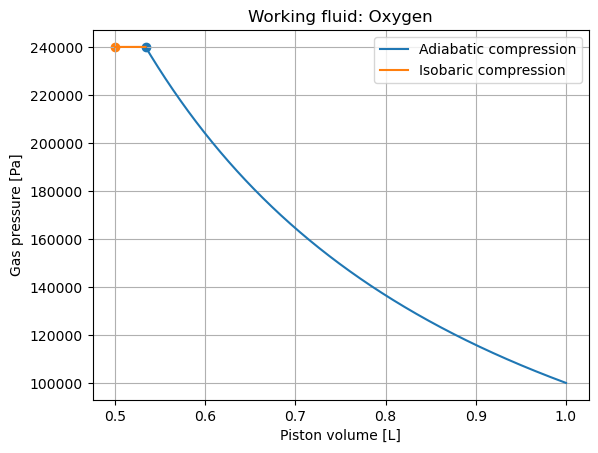

In [24]:
import termoPy as tp

# Create a Fluid object and perform a thermodynamic process
O2 = tp.Fluid(P=1e5, V=1e-3, T=500, gas='O2')
O2.adiabatic(P=2.4e5, time=4)
O2.isobaric(T=600)

tp.plot(O2, display="VP")
tp.show()

### Example of 3-variable plot

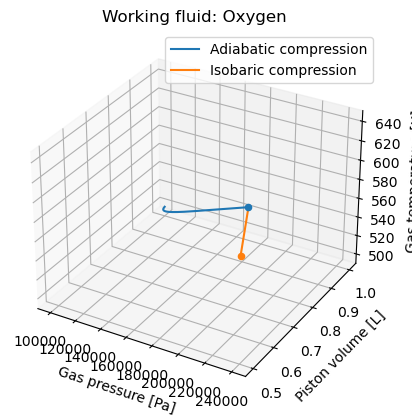

In [25]:
import termoPy as tp

# Create a Fluid object and perform a thermodynamic process
O2 = tp.Fluid(P=1e5, V=1e-3, T=500, gas='O2')
O2.adiabatic(P=2.4e5, time=4)
O2.isobaric(T=600)

tp.plot(O2, display="PVT")
tp.show()

## Modeling Thermodynamic Cycles

Termopy goes beyond individual processes and provides the ability to model complete thermodynamic cycles. It includes the following cycles: Carnot cycle, Stirling cycle, and Otto cycle. These cycles are implemented as classes, and they extend the capabilities of the library.

### Carnot Cycle

The Carnot cycle is a fundamental thermodynamic cycle that represents the theoretical maximum efficiency for a heat engine operating between two temperature reservoirs. To create a Carnot cycle using Termopy, you can use the `Carnot` class. Here's an example of how to use it:

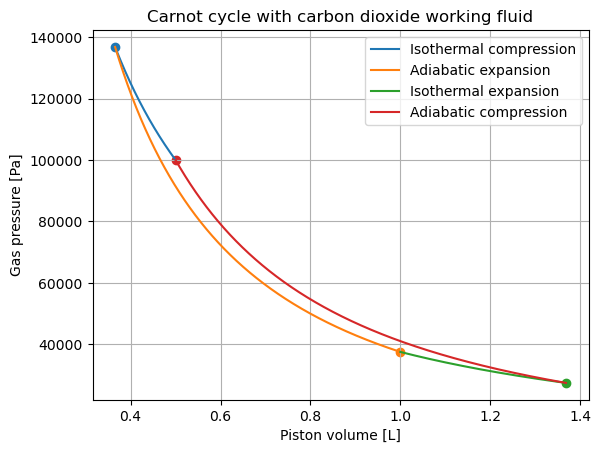

In [3]:
carnot = tp.Carnot(T_hot=400,T_cold=300,compression_ratio=2,P=1e5,V=1e-3,gas='CO2')
tp.plot(carnot,display="VP")
tp.show()

1.1.2
0.4418643222699116 2.2631381390171454


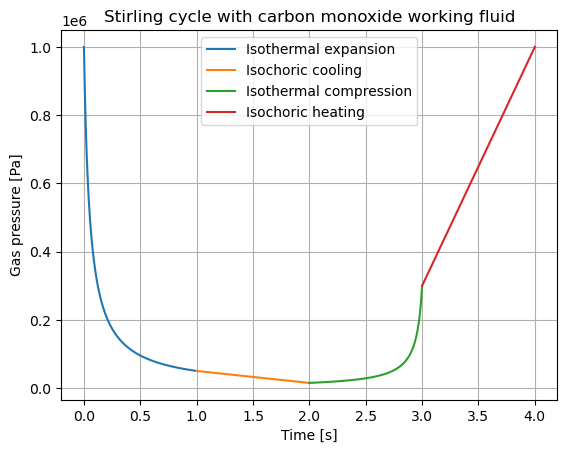

In [4]:
stirling = tp.Stirling(T_hot=1000,T_cold=300,compression_ratio=20,P=1e6,V=1e-3,gas='CO')

print(tp.version)

print(stirling.efficiency, stirling.COP)

tp.plot(stirling,display="P")
tp.show()

0.18815313310664308


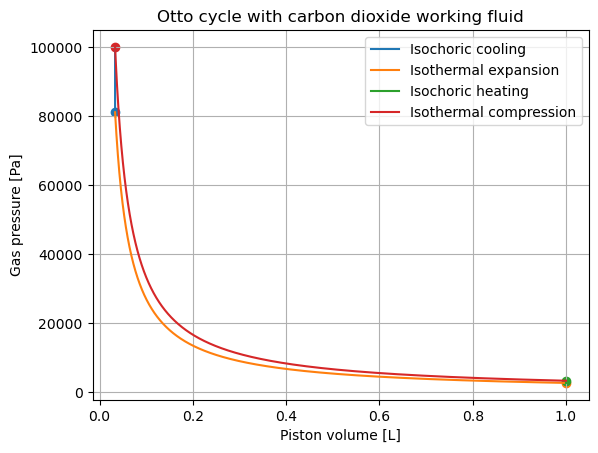

In [5]:
otto = tp.Otto(T_hot=370,T_cold=300,compression_ratio=30,P=1e5,V=1e-3,gas='CO2')

tp.plot(otto,display="VP")

print(otto.efficiency)

tp.show()

# Termopy: Fluid Object Variables and Functions

The Termopy library provides a Fluid object that allows you to model and analyze thermodynamic processes. This documentation outlines the variables and functions available within the Fluid object for your reference.

## Fluid Object Variables

### Work (Variable: Scalar)

The `Work` variable represents the work done on the gas during the entire process. It is calculated through numerical integration of the pressure-volume (PV) curve. This variable provides insights into the energy exchange during the process.

### Heat (Variable: Vector)

The `Heat` variable is a vector that represents the heat absorbed by the gas throughout the process. It stores the cumulative heat absorbed by the gas at each point in time. Analyzing this variable helps in understanding the heat transfer within the system.

### Entropy (Variable: Vector)

The `Entropy` variable is a vector that tracks the changes in entropy over time during the process. Entropy is a fundamental thermodynamic property that can be used to assess the irreversibility of a process.

### Time Taken (Variable: Scalar)

The `Time Taken` variable provides the total duration of the process in seconds. It is the sum of the time taken for each sub-process within the overall thermodynamic process.

### Heat Added (Variable: Scalar)

The `Heat Added` variable is a scalar that represents the total amount of heat added to the system during the various processes. It provides insights into the heat input to the system.

### Heat Removed (Variable: Scalar)

The `Heat Removed` variable is a scalar that represents the total amount of heat removed from the system during the different processes. It helps in understanding the heat dissipation or removal from the system.

### Internal Energy (Variable: Scalar)

The `Internal Energy` variable represents the internal energy of the gas and is calculated based on the specific heat at constant volume (`Cv`). It provides information about the energy stored within the gas.

### Temperature (Variable: Vector)

The `Temperature` variable is a vector that records the temperature of the gas over time during the process. Understanding temperature changes is crucial for analyzing thermodynamic behavior.

### Pressure (Variable: Vector)

The `Pressure` variable is a vector that tracks changes in pressure over time. It helps in assessing the effects of pressure on the gas during the process.

### Volume (Variable: Vector)

The `Volume` variable is a vector that represents the changes in the volume of the gas throughout the process. Analyzing volume changes is essential for understanding the expansion or compression of the gas.

### Number of Moles (Variable: Scalar)

The `Number of Moles` variable is a scalar that defines the quantity of gas in moles. It's an essential factor for determining gas properties and behavior.

## Fluid Object Functions

### isothermal(P=None, V=None, T=None, n=None)

The `isothermal` function simulates an isothermal process for the Fluid object. You can specify the final pressure (`P`), final volume (`V`), final temperature (`T`), or the number of moles (`n`) as the endpoint of the process. This function changes the state of the gas while keeping the temperature constant.

### adiabatic(P=None, V=None, T=None, n=None)

The `adiabatic` function simulates an adiabatic process for the Fluid object. Similar to the `isothermal` function, you can specify the final pressure (`P`), final volume (`V`), final temperature (`T`), or the number of moles (`n`) as the endpoint of the process. Adiabatic processes do not exchange heat with the surroundings.

### isobaric(P=None, V=None, T=None, n=None)

The `isobaric` function simulates an isobaric process for the Fluid object. You can specify the final pressure (`P`), final volume (`V`), final temperature (`T`), or the number of moles (`n`) as the endpoint of the process. This function changes the state of the gas while keeping the pressure constant.

### isochoric(P=None, V=None, T=None, n=None)

The `isochoric` function simulates an isochoric (constant volume) process for the Fluid object. You can specify the final pressure (`P`), final volume (`V`), final temperature (`T`), or the number of moles (`n`) as the endpoint of the process. This function keeps the volume of the gas constant throughout the process.

### plot(Fluid, display=None)

The `plot` function is used to generate graphical plots that visualize the thermodynamic process recorded within the Fluid object. It offers various options for displaying different properties such as pressure, volume, and temperature.

### show()

The `show` function is used to display the plots generated by the `plot` function. This function simplifies the process of viewing and analyzing the graphical representations of the thermodynamic process.

In conclusion, the Fluid object in the Termopy library provides a wide range of variables and functions to help you model and analyze thermodynamic processes. By utilizing these variables and functions, you can gain a comprehensive understanding of the behavior of ideal gases under various conditions and during different processes.

In conclusion, the Fluid object in the Termopy library provides a wide range of variables and functions to help you model and analyze thermodynamic processes. By utilizing these variables and functions, you can gain a comprehensive understanding of the behavior of ideal gases under various conditions and during different processes.
